In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import figure
sns.set_theme()


In [2]:
# load and read 2 csv files. 'world-happiness-report.csv' contains the timeline which we are working on.

df20=pd.read_csv('world-happiness-report.csv')
df=pd.read_csv("world-happiness-report-2021.csv")


In [3]:
#rename the column names

df20.rename(columns={'Country name':'country','Life Ladder':'happiness','Log GDP per capita':'income',\
                    'Social support':'social_support','Healthy life expectancy at birth':'health',\
                     'Freedom to make life choices':'freedom','Generosity':'generosity',\
                     'Perceptions of corruption':'perception_corruption','Positive affect':'pos_effect',\
                    'Negative affect':'neg_effect'},inplace=True)

In [4]:
#rename the column names

df.rename(columns={'Country name':'country','Regional indicator':'region','Ladder score':'score', \
                  'Standard error of ladder score':'stderr_score','Logged GDP per capita':'gdp', \
                   'Social support':'social_support','Healthy life expectancy':'life_expectancy',\
                  'Freedom to make life choices':'freedom','Generosity':'generosity',\
                  'Perceptions of corruption':'corruption',},inplace=True)

In [5]:
#displaying the values of the 'region' column in df20

df.region.value_counts()


Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: region, dtype: int64

In [6]:
# creating 10 lists of countries in their respective regions. 

ss_afr = df.loc[df['region']=='Sub-Saharan Africa', 'country'].tolist()
w_eur = df.loc[df['region']=='Western Europe', 'country'].tolist()
la_am = df.loc[df['region']=='Latin America and Caribbean', 'country'].tolist()
ce_eur = df.loc[df['region']=='Central and Eastern Europe', 'country'].tolist()
men_afr = df.loc[df['region']=='Middle East and North Africa', 'country'].tolist()
com = df.loc[df['region']=='Commonwealth of Independent States', 'country'].tolist()
sea = df.loc[df['region']=='Southeast Asia', 'country'].tolist()
ea = df.loc[df['region']=='East Asia', 'country'].tolist()
naa = df.loc[df['region']=='North America and ANZ', 'country'].tolist()
sa = df.loc[df['region']=='South Asia', 'country'].tolist()

sa_list=[]
cty = df20['country'].tolist()

In [7]:
#create a new list 'reg' comprising of 'regions' classification according to individual countries.

reg = []
for i in cty:
    if i in ss_afr:
        reg.append('Sub-Saharan Africa')
    elif i in w_eur:
        reg.append('Western Europe')
    elif i in la_am:
        reg.append('Latin America and Caribbean')
    elif i in ce_eur:
        reg.append('Central and Eastern Europe')
    elif i in men_afr:
        reg.append('Middle East and North Africa')
    elif i in com:
        reg.append('Commonwealth of Independent States')
    elif i in sea:
        reg.append('Southeast Asia')
    elif i in ea:
        reg.append('East Asia')
    elif i in naa:
        reg.append('North America and ANZ')
    elif i in sa:
        reg.append('South Asia')
    else:
        reg.append(np.nan)
        

len(cty), len(reg)



(1949, 1949)

In [8]:
#add make a copy of df20 (optional), interpolate nan values

df22=df20.copy()
#df22['regions']=pd.DataFrame(reg)
df22.isnull().sum()
df22.interpolate(method='ffill', inplace=True)


In [9]:
#make a new column 'regions', check for nan values. Append the list 'reg' with regional classification to new column 'regions'

df22['regions']=pd.DataFrame(reg)
df22.isnull().sum()

country                   0
year                      0
happiness                 0
income                    0
social_support            0
health                    0
freedom                   0
generosity                0
perception_corruption     0
pos_effect                0
neg_effect                0
regions                  63
dtype: int64

In [10]:
# drop rows containing missing values

df22.dropna(axis=0,how='any', inplace=True)
df22.isnull().sum()
df22.shape

(1886, 12)

In [11]:
#convert year to datetime format (successful)

from datetime import datetime
k= df22['year'].astype(str).values.tolist()
k1=[]
for i in k:
    kobj= datetime.strptime(i,'%Y').date()
    k1.append(kobj)
df22['year']=k1


In [12]:
#reorder 'regions' to the 2nd position of dataframe

df22.columns
df22 = df22[['country','regions', 'year', 'happiness', 'income', 'social_support', 'health',\
       'freedom', 'generosity', 'perception_corruption', 'pos_effect',\
       'neg_effect']]

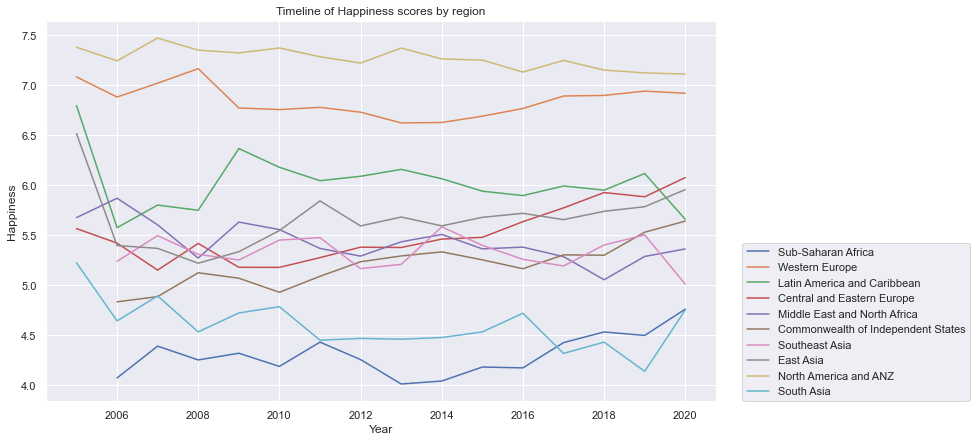

In [13]:
#create dataframes according to regions

df_ss_afr = df22.loc[df22['regions']=='Sub-Saharan Africa',['year','happiness','regions']]
df_w_eur = df22.loc[df22['regions']=='Western Europe',['year','happiness','regions']]
df_w_eur = df22.loc[df22['regions']=='Western Europe',['year','happiness','regions']]
df_la_am = df22.loc[df22['regions']=='Latin America and Caribbean',['year','happiness','regions']]
df_ce_eur = df22.loc[df22['regions']=='Central and Eastern Europe',['year','happiness','regions']]
df_men_afr = df22.loc[df22['regions']=='Middle East and North Africa',['year','happiness','regions']]
df_com = df22.loc[df22['regions']=='Commonwealth of Independent States',['year','happiness','regions']]
df_sea = df22.loc[df22['regions']=='Southeast Asia',['year','happiness','regions']]
df_ea = df22.loc[df22['regions']=='East Asia',['year','happiness','regions']]
df_naa = df22.loc[df22['regions']=='North America and ANZ',['year','happiness','regions']]
df_sa = df22.loc[df22['regions']=='South Asia',['year','happiness','regions']]

# calculate the mean of happiness grouping by regions

a=df_ss_afr.groupby('year')['happiness'].agg(np.mean).to_frame()
df_ss_afr=a.reset_index()

b=df_w_eur.groupby('year')['happiness'].agg(np.mean).to_frame()
df_w_eur=b.reset_index()

c=df_la_am.groupby('year')['happiness'].agg(np.mean).to_frame()
df_la_am=c.reset_index()

d=df_ce_eur.groupby('year')['happiness'].agg(np.mean).to_frame()
df_ce_eur=d.reset_index()

e=df_men_afr.groupby('year')['happiness'].agg(np.mean).to_frame()
df_men_afr=e.reset_index()

f=df_com.groupby('year')['happiness'].agg(np.mean).to_frame()
df_com=f.reset_index()

g=df_sea.groupby('year')['happiness'].agg(np.mean).to_frame()
df_sea=g.reset_index()

h=df_ea.groupby('year')['happiness'].agg(np.mean).to_frame()
df_ea=h.reset_index()

i=df_naa.groupby('year')['happiness'].agg(np.mean).to_frame()
df_naa=i.reset_index()

j=df_sa.groupby('year')['happiness'].agg(np.mean).to_frame()
df_sa=j.reset_index()

#plot timebased line plot against happiness according to regions

fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.plot(df_ss_afr.year, df_ss_afr.happiness);
plt.plot(df_w_eur.year, df_w_eur.happiness);
plt.plot(df_la_am.year, df_la_am.happiness);
plt.plot(df_ce_eur.year, df_ce_eur.happiness);
plt.plot(df_men_afr.year, df_men_afr.happiness);
plt.plot(df_com.year, df_com.happiness);
plt.plot(df_sea.year, df_sea.happiness);
plt.plot(df_ea.year, df_ea.happiness);
plt.plot(df_naa.year, df_naa.happiness);
plt.plot(df_sa.year, df_sa.happiness);

plt.xlabel('Year');
plt.ylabel('Happiness');
plt.legend(['Sub-Saharan Africa','Western Europe','Latin America and Caribbean','Central and Eastern Europe',\
           'Middle East and North Africa','Commonwealth of Independent States','Southeast Asia','East Asia',\
           'North America and ANZ','South Asia'],loc=(1.04,0));
plt.title('Timeline of Happiness scores by region');